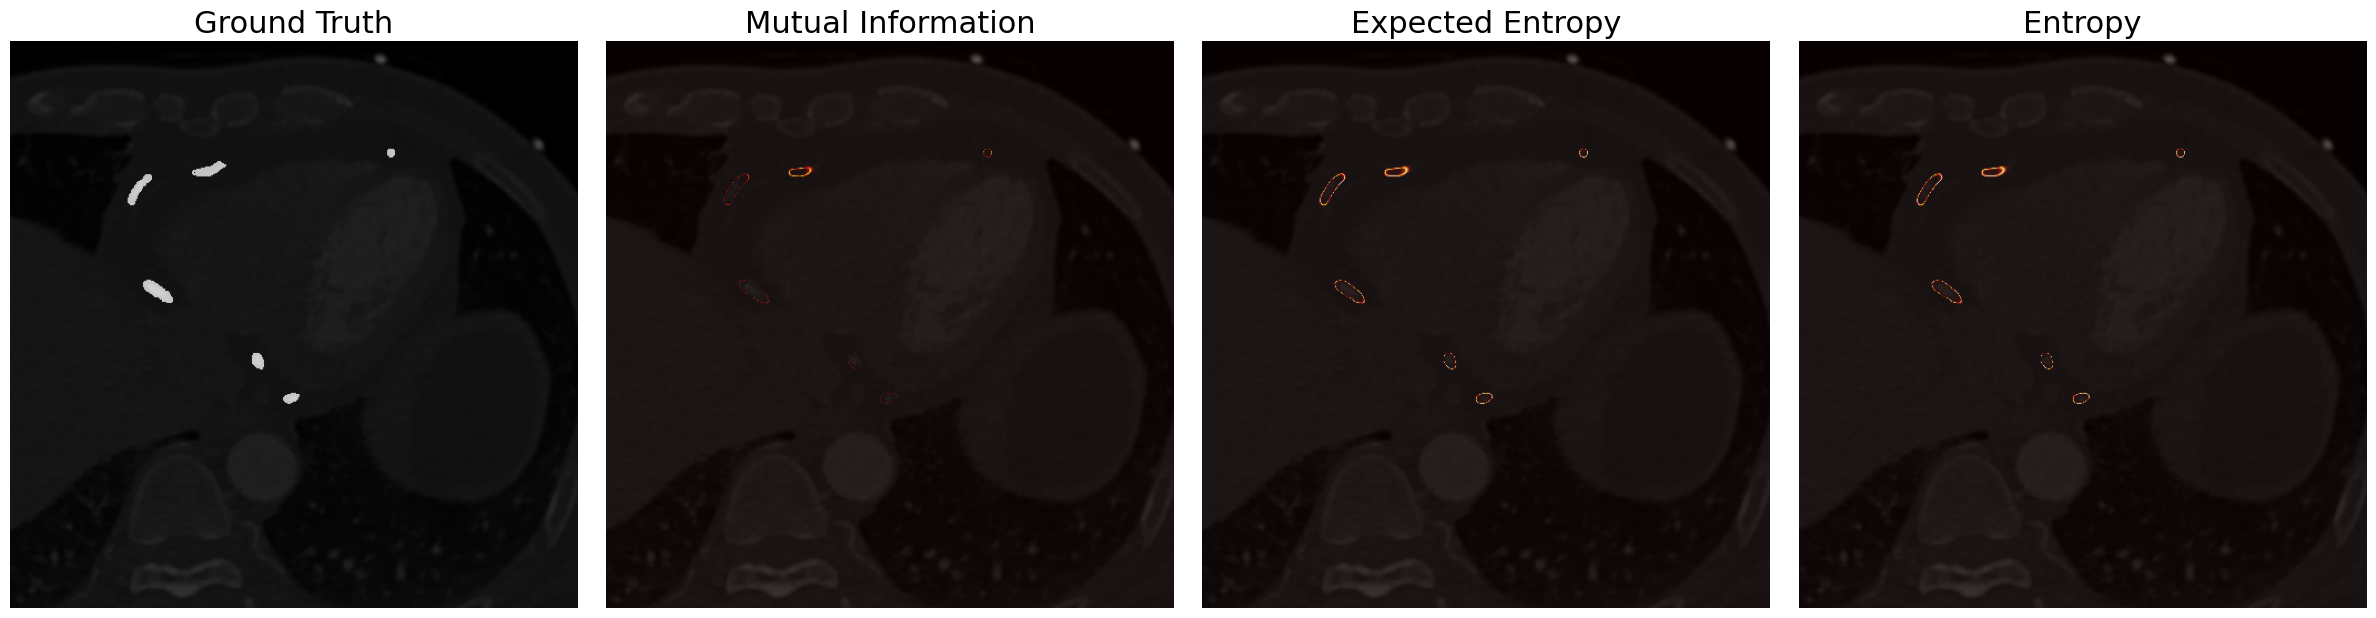

In [ ]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# Paths
paths = {
    "Shannon Entropy": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/inference/case_0144/case_0144_shannon_entropy.nii.gz',
    "Variance": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/inference/case_0144/case_0144_var.nii.gz',
    "Mutual Information": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/inference/case_0144/case_0144_mutual_info.nii.gz',
    "Expected Entropy": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/inference/case_0144/case_0144_expected_entropy.nii.gz',
    "Ground Truth": '/data/dsstu/nnUNet_raw/Dataset003_ImageCAS_split/labelsTs/case_0144.nii.gz'
}

ct_path = '/data/dsstu/nnUNet_raw/Dataset003_ImageCAS_split/imagesTs/case_0144_0000.nii.gz'

# Load CT and uncertainty maps
ct = nib.load(ct_path).get_fdata()
shannon = nib.load(paths["Shannon Entropy"]).get_fdata()
expected_entropy = nib.load(paths["Expected Entropy"]).get_fdata()
mutual_info = nib.load(paths["Mutual Information"]).get_fdata()
gt = nib.load(paths["Ground Truth"]).get_fdata()

# Choose a slice (axial slice index)
z =  127 
ct_slice = ct[:, :, z]
shannon_slice = shannon[:, :, z]
expected_entropy_slice = expected_entropy[:, :, z]
mutual_info_slice = mutual_info[:, :, z]
gt_slice = gt[:, :, z]

# Crop to center half in both x and y
def crop_center(img, frac=1):
    y, x = img.shape
    cropy, cropx = int(y * frac), int(x * frac)
    starty = (y - cropy) // 2
    startx = (x - cropx) // 2
    return img[starty:starty+cropy, startx:startx+cropx]

ct_slice = crop_center(ct_slice)
shannon_slice = crop_center(shannon_slice)
expected_entropy_slice = crop_center(expected_entropy_slice)
mutual_info_slice = crop_center(mutual_info_slice)
gt_slice = crop_center(gt_slice)

# Normalize for display
ct_norm = (ct_slice - np.min(ct_slice)) / (np.max(ct_slice) - np.min(ct_slice))
shannon_norm = (shannon_slice - np.min(shannon_slice)) / (np.max(shannon_slice) - np.min(shannon_slice))
expected_entropy_norm = (expected_entropy_slice - np.min(expected_entropy_slice)) / (np.max(expected_entropy_slice) - np.min(expected_entropy_slice))
mutual_info_norm = (mutual_info_slice - np.min(mutual_info_slice)) / (np.max(mutual_info_slice) - np.min(mutual_info_slice))
# For ground truth, no normalization, just display as mask

# Plot overlays with separate axes to avoid CT color change
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# Panel 1: Ground Truth overlay
axes[0].imshow(ct_norm.T, cmap='gray', origin='lower')
axes[0].imshow(gt_slice.T, cmap='gray', alpha=0.7, origin='lower', vmin=0, vmax=1)
axes[0].set_title('Ground Truth', fontsize=22)
axes[0].axis('off')

# Panel 2: Mutual Information overlay
axes[1].imshow(ct_norm.T, cmap='gray', origin='lower')
im1 = axes[1].imshow(mutual_info_norm.T, cmap='hot', alpha=0.7, origin='lower', vmin=0, vmax=1)
axes[1].set_title('Mutual Information', fontsize=22)
axes[1].axis('off')

# Panel 3: Expected Entropy overlay
axes[2].imshow(ct_norm.T, cmap='gray', origin='lower')
im2 = axes[2].imshow(expected_entropy_norm.T, cmap='hot', alpha=0.7, origin='lower', vmin=0, vmax=1)
axes[2].set_title('Expected Entropy', fontsize=22)
axes[2].axis('off')

# Panel 4: Shannon Entropy overlay
axes[3].imshow(ct_norm.T, cmap='gray', origin='lower')
im3 = axes[3].imshow(shannon_norm.T, cmap='hot', alpha=0.7, origin='lower', vmin=0, vmax=1)
axes[3].set_title('Entropy', fontsize=22)
axes[3].axis('off')

plt.tight_layout()
plt.show()


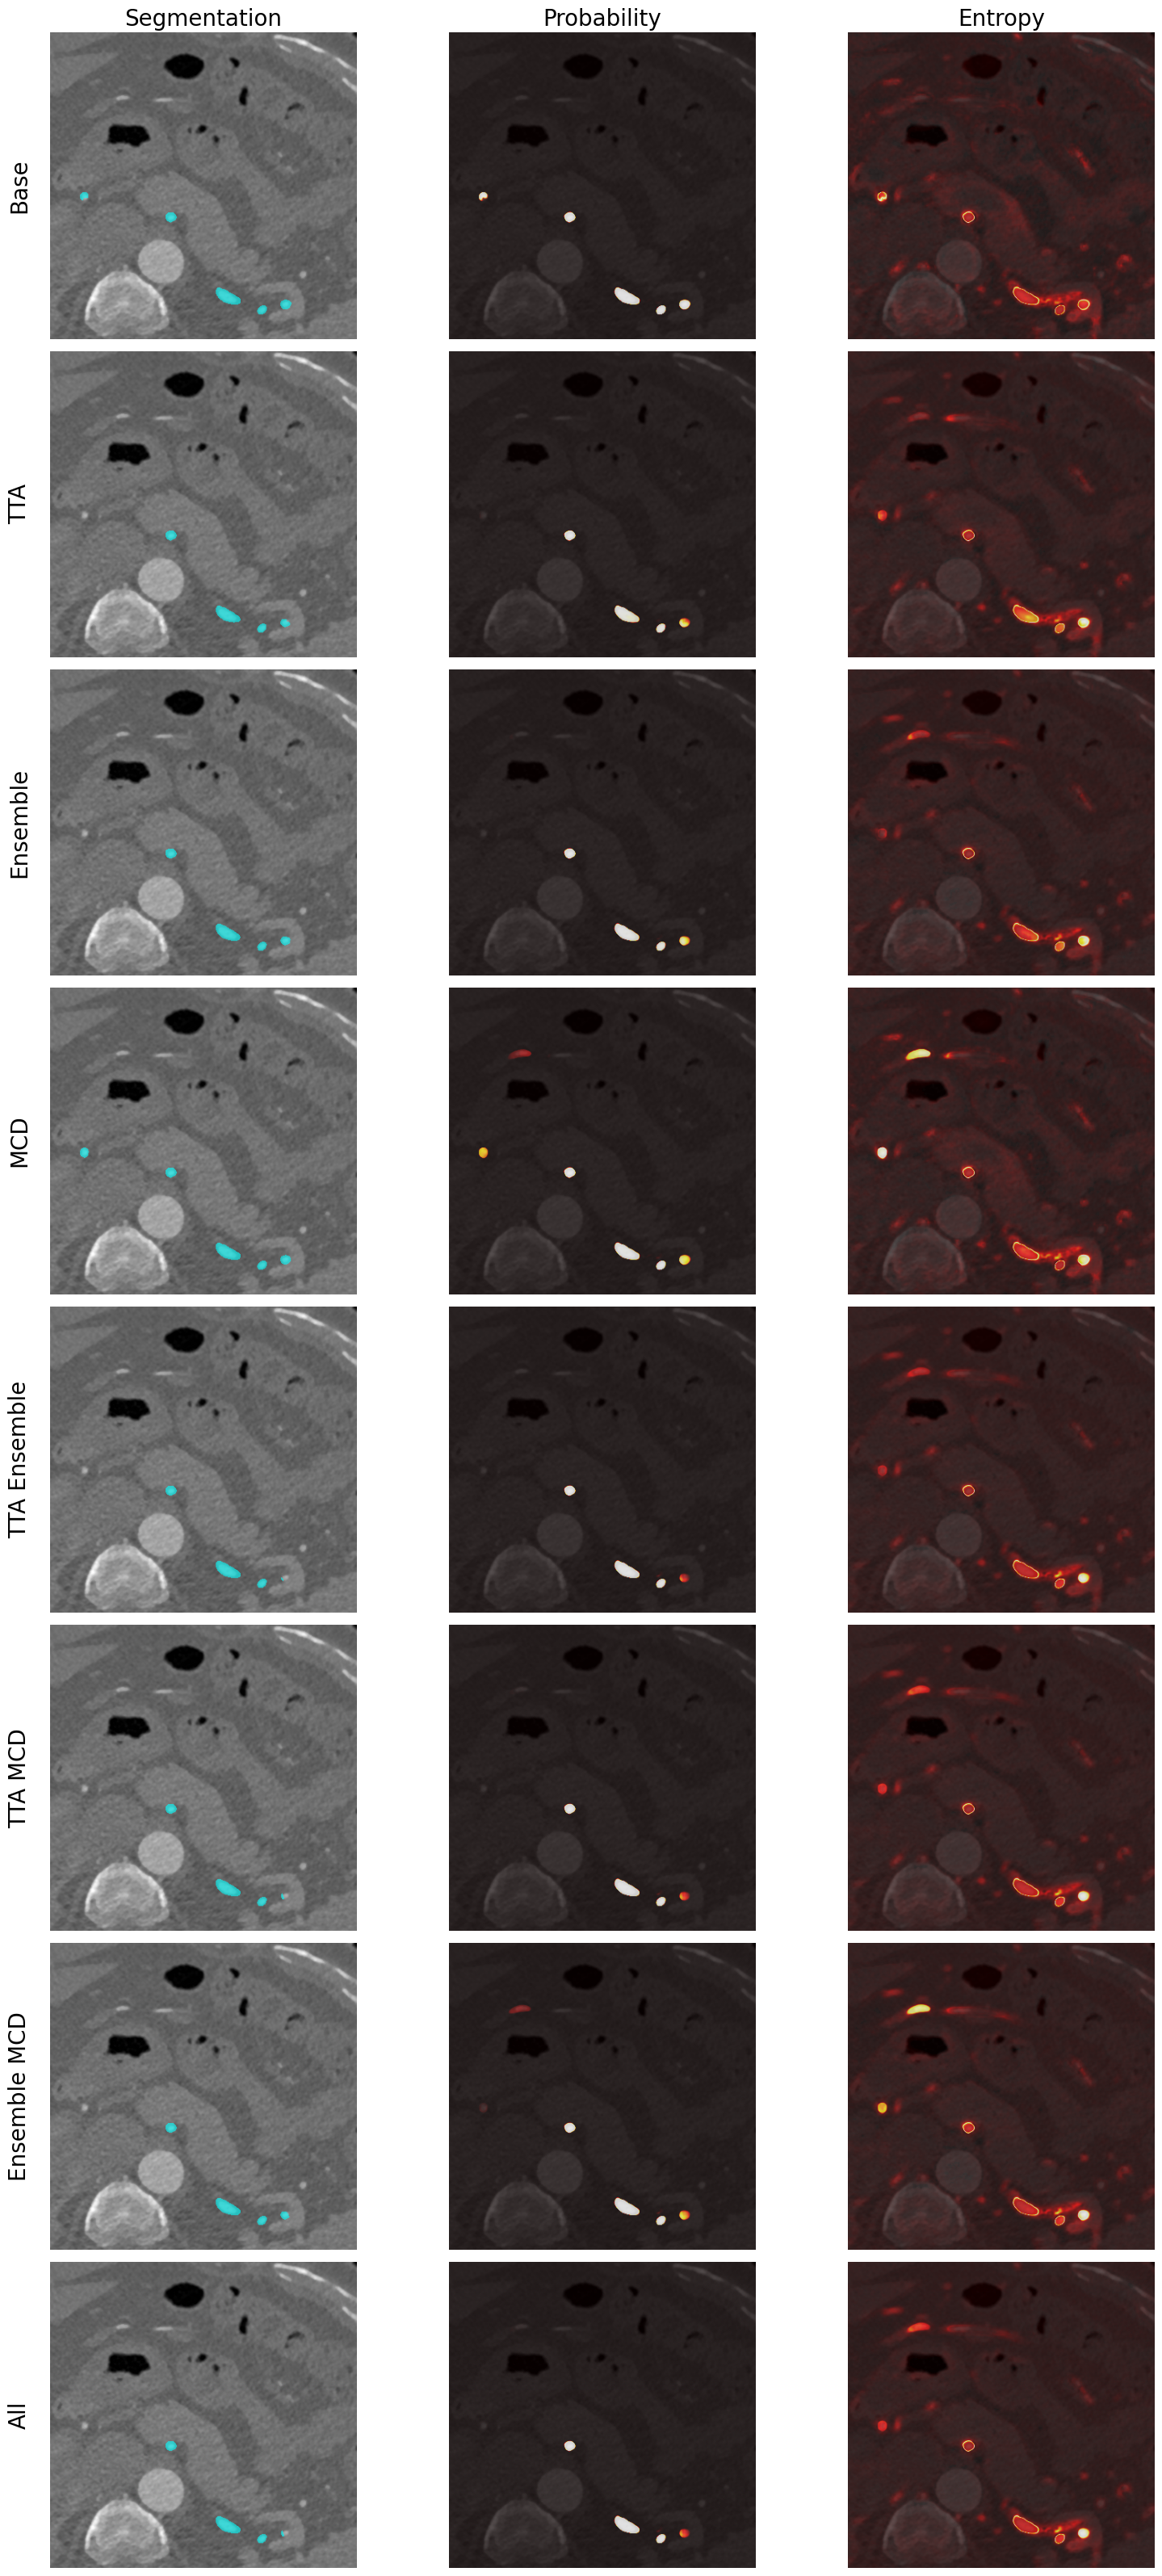

In [ ]:

import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# Paths for each model/setting
paths = {
    "mcd": {
        "seg": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/mcd/case_0144/case_0144_seg.nii.gz',
        "prob": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/mcd/case_0144/case_0144_foreground.nii.gz',
        "entropy": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/mcd/case_0144/case_0144_shannon_entropy.nii.gz'
    },
    "all": {
        "seg": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/all/case_0144/case_0144_seg.nii.gz',
        "prob": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/all/case_0144/case_0144_foreground.nii.gz',
        "entropy": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/all/case_0144/case_0144_shannon_entropy.nii.gz'
    },
    "ens_mcd": {
        "seg": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/ens_mcd/case_0144/case_0144_seg.nii.gz',
        "prob": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/ens_mcd/case_0144/case_0144_foreground.nii.gz',
        "entropy": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/ens_mcd/case_0144/case_0144_shannon_entropy.nii.gz'
    },
    "tta_mcd": {
        "seg": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/all/case_0144/case_0144_seg.nii.gz',
        "prob": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/all/case_0144/case_0144_foreground.nii.gz',
        "entropy": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/all/case_0144/case_0144_shannon_entropy.nii.gz'
    },
    "tta": {
        "seg": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p00_s2__3d_fullres/tta/case_0144/case_0144_seg.nii.gz',
        "prob": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p00_s2__3d_fullres/tta/case_0144/case_0144_foreground.nii.gz',
        "entropy": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p00_s2__3d_fullres/tta/case_0144/case_0144_shannon_entropy.nii.gz'
    },
    "tta_ens": {
        "seg": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p00_s2__3d_fullres/tta_ens/case_0144/case_0144_seg.nii.gz',
        "prob": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p00_s2__3d_fullres/tta_ens/case_0144/case_0144_foreground.nii.gz',
        "entropy": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p00_s2__3d_fullres/tta_ens/case_0144/case_0144_shannon_entropy.nii.gz'
    },
    "base":{
        "seg": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p00_s2__3d_fullres/base/case_0144/case_0144_seg.nii.gz',
        "prob": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p00_s2__3d_fullres/base/case_0144/case_0144_foreground.nii.gz',
        "entropy": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p00_s2__3d_fullres/base/case_0144/case_0144_shannon_entropy.nii.gz'
    },
    "ens":{
        "seg": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p00_s2__3d_fullres/ens/case_0144/case_0144_seg.nii.gz',
        "prob": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p00_s2__3d_fullres/ens/case_0144/case_0144_foreground.nii.gz',
        "entropy": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p00_s2__3d_fullres/ens/case_0144/case_0144_shannon_entropy.nii.gz'
    }

}

model_names = [
    "base", "tta", "ens", "mcd", "tta_ens", "tta_mcd", "ens_mcd", "all"
]
display_names = [
    "Base", "TTA", "Ensemble", "MCD", "TTA Ensemble", "TTA MCD", "Ensemble MCD", "All"
]

# Load CT and GT for background/mask
ct_path = '/data/dsstu/nnUNet_raw/Dataset003_ImageCAS_split/imagesTs/case_0144_0000.nii.gz'
gt_path = '/data/dsstu/nnUNet_raw/Dataset003_ImageCAS_split/labelsTs/case_0144.nii.gz'
ct = nib.load(ct_path).get_fdata()
gt = nib.load(gt_path).get_fdata()

# Choose a slice (axial)
z = 12
ct_slice = ct[:, :, z]
gt_slice = gt[:, :, z]

def crop_center(img, frac=0.8):
    y, x = img.shape
    cropy, cropx = int(y * frac), int(x * frac)
    starty = (y - cropy) // 2
    startx = (x - cropx) // 2
    return img[starty:starty+cropy, startx:startx+cropx]

ct_slice = crop_center(ct_slice)
gt_slice = crop_center(gt_slice)
ct_norm = (ct_slice - np.min(ct_slice)) / (np.max(ct_slice) - np.min(ct_slice))

# Prepare grid: each row is a model, columns: Seg, Prob, Entropy
n_models = len(model_names)
fig, axes = plt.subplots(n_models, 3, figsize=(16, 4 * n_models), sharex=True, sharey=True)

def intensify_low_values(entropy_norm, power):
    """Intensify low values in the entropy map."""
    return np.clip(entropy_norm ** power, 0, 1)

for i, (model, disp_name) in enumerate(zip(model_names, display_names)):
    # Load model outputs
    seg = nib.load(paths[model]["seg"]).get_fdata()[:, :, z]
    prob = nib.load(paths[model]["prob"]).get_fdata()[:, :, z]
    entropy = nib.load(paths[model]["entropy"]).get_fdata()[:, :, z]
    seg = crop_center(seg)
    prob = crop_center(prob)
    entropy = crop_center(entropy)
    # Normalize
    prob_norm = (prob - np.min(prob)) / (np.max(prob) - np.min(prob))
    entropy_norm = (entropy - np.min(entropy)) / (np.max(entropy) - np.min(entropy))
    entropy_norm = intensify_low_values(entropy_norm, power=0.3)
    # Seg mask RGBA
    seg_mask = np.zeros((*seg.T.shape, 4))
    seg_mask[..., 0] = 0.0
    seg_mask[..., 1] = 1.0
    seg_mask[..., 2] = 1.0
    seg_mask[..., 3] = (seg.T > 0).astype(float) * 0.6

    # Seg
    axes[i, 0].imshow(ct_norm.T, cmap='gray', origin='lower')
    axes[i, 0].imshow(seg_mask, origin='lower')
    axes[i, 0].axis('off')
    # Prob
    axes[i, 1].imshow(ct_norm.T, cmap='gray', origin='lower')
    axes[i, 1].imshow(prob_norm.T, cmap='hot', alpha=0.7, origin='lower', vmin=0, vmax=1)
    axes[i, 1].axis('off')
    # Entropy
    axes[i, 2].imshow(ct_norm.T, cmap='gray', origin='lower')
    axes[i, 2].imshow(entropy_norm.T, cmap='hot', alpha=0.7, origin='lower', vmin=0, vmax=1)
    axes[i, 2].axis('off')
    # Add model label to y-axis, centered vertically for the row
    axes[i, 0].annotate(disp_name, xy=(-0.1, 0.5), xycoords='axes fraction', fontsize=20, rotation=90, ha='center', va='center', annotation_clip=False)

# Set column titles only once at the top
for j, col in enumerate(["Segmentation", "Probability", "Entropy"]):
    axes[0, j].set_title(col, fontsize=20)

plt.tight_layout()
plt.show()



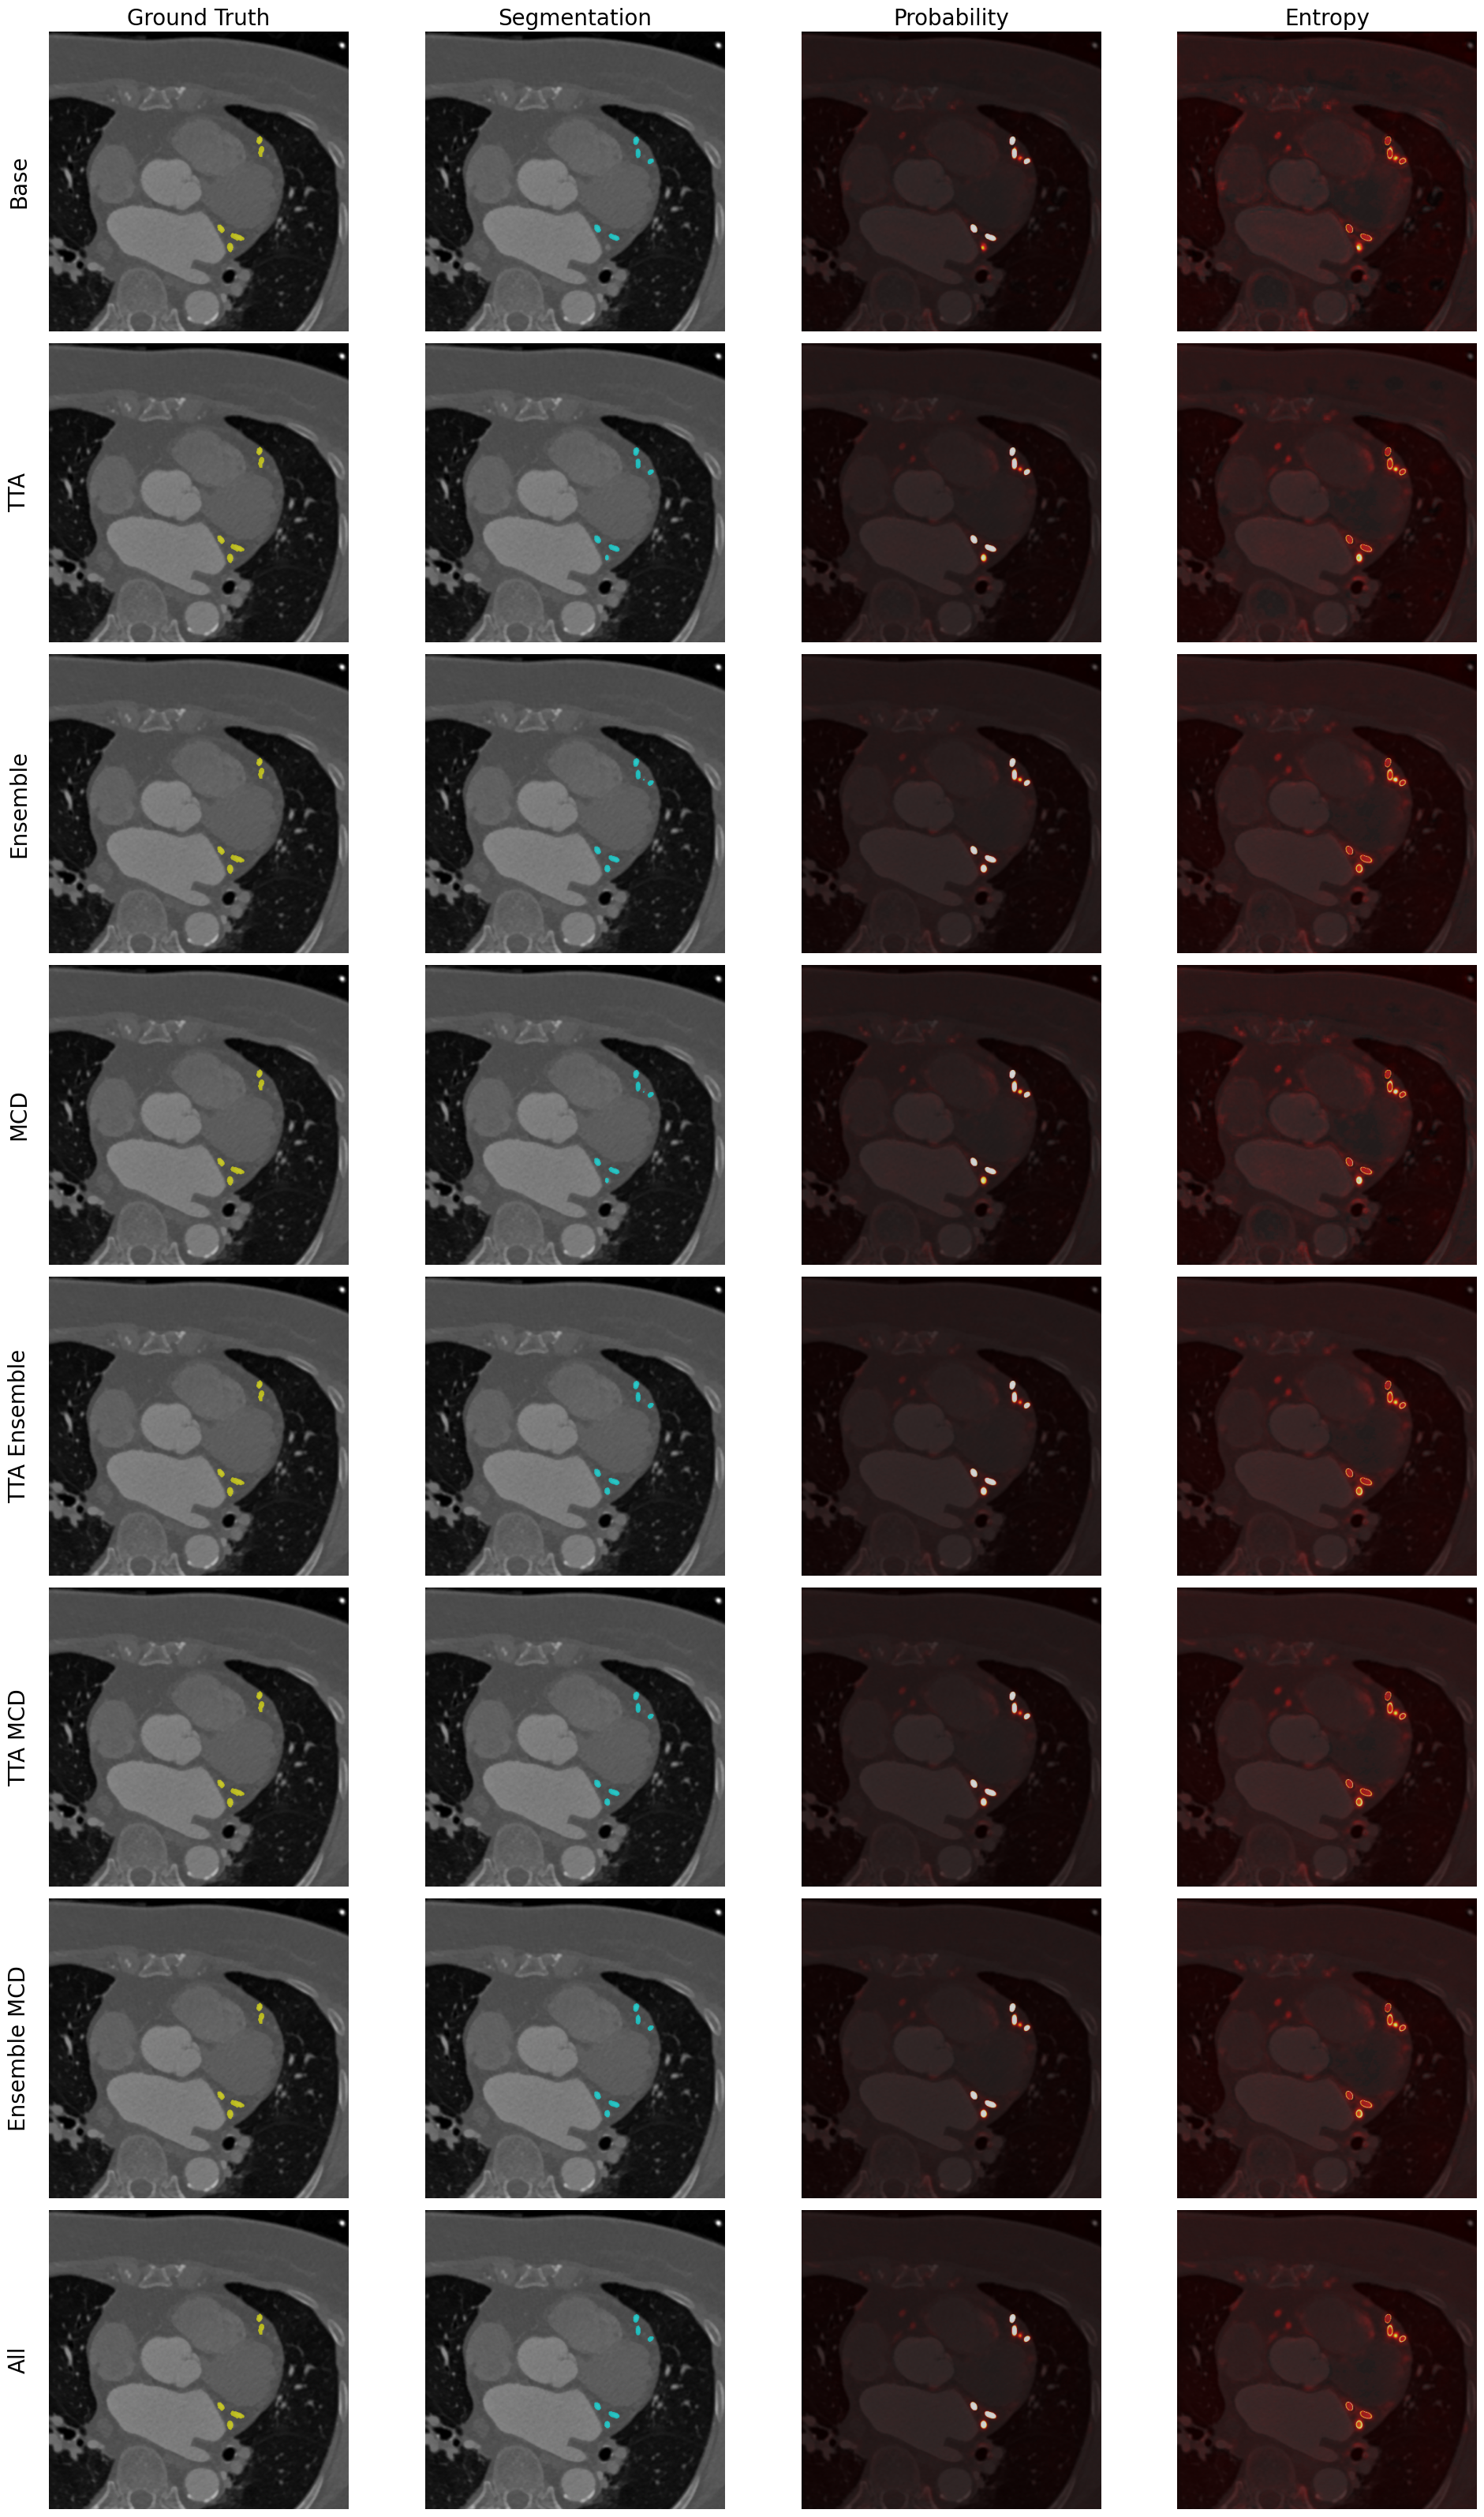

In [28]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# Paths for each model/setting
paths = {
    "mcd": {
        "seg": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/mcd/case_0144/case_0144_seg.nii.gz',
        "prob": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/mcd/case_0144/case_0144_foreground.nii.gz',
        "entropy": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/mcd/case_0144/case_0144_shannon_entropy.nii.gz'
    },
    "all": {
        "seg": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/all/case_0144/case_0144_seg.nii.gz',
        "prob": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/all/case_0144/case_0144_foreground.nii.gz',
        "entropy": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/all/case_0144/case_0144_shannon_entropy.nii.gz'
    },
    "ens_mcd": {
        "seg": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/ens_mcd/case_0144/case_0144_seg.nii.gz',
        "prob": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/ens_mcd/case_0144/case_0144_foreground.nii.gz',
        "entropy": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/ens_mcd/case_0144/case_0144_shannon_entropy.nii.gz'
    },
    "tta_mcd": {
        "seg": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/all/case_0144/case_0144_seg.nii.gz',
        "prob": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/all/case_0144/case_0144_foreground.nii.gz',
        "entropy": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/all/case_0144/case_0144_shannon_entropy.nii.gz'
    },
    "tta": {
        "seg": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p00_s2__3d_fullres/tta/case_0144/case_0144_seg.nii.gz',
        "prob": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p00_s2__3d_fullres/tta/case_0144/case_0144_foreground.nii.gz',
        "entropy": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p00_s2__3d_fullres/tta/case_0144/case_0144_shannon_entropy.nii.gz'
    },
    "tta_ens": {
        "seg": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p00_s2__3d_fullres/tta_ens/case_0144/case_0144_seg.nii.gz',
        "prob": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p00_s2__3d_fullres/tta_ens/case_0144/case_0144_foreground.nii.gz',
        "entropy": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p00_s2__3d_fullres/tta_ens/case_0144/case_0144_shannon_entropy.nii.gz'
    },
    "base":{
        "seg": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p00_s2__3d_fullres/base/case_0144/case_0144_seg.nii.gz',
        "prob": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p00_s2__3d_fullres/base/case_0144/case_0144_foreground.nii.gz',
        "entropy": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p00_s2__3d_fullres/base/case_0144/case_0144_shannon_entropy.nii.gz'
    },
    "ens":{
        "seg": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p00_s2__3d_fullres/ens/case_0144/case_0144_seg.nii.gz',
        "prob": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p00_s2__3d_fullres/ens/case_0144/case_0144_foreground.nii.gz',
        "entropy": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p00_s2__3d_fullres/ens/case_0144/case_0144_shannon_entropy.nii.gz'
    }
}

model_names = [
    "base", "tta", "ens", "mcd", "tta_ens", "tta_mcd", "ens_mcd", "all"
]
display_names = [
    "Base", "TTA", "Ensemble", "MCD", "TTA Ensemble", "TTA MCD", "Ensemble MCD", "All"
]

# Load CT and GT for background/mask
ct_path = '/data/dsstu/nnUNet_raw/Dataset003_ImageCAS_split/imagesTs/case_0144_0000.nii.gz'
gt_path = '/data/dsstu/nnUNet_raw/Dataset003_ImageCAS_split/labelsTs/case_0144.nii.gz'
ct = nib.load(ct_path).get_fdata()
gt = nib.load(gt_path).get_fdata()

# Choose a slice (axial)

z = 145
ct_slice = ct[:, :, z]
gt_slice = gt[:, :, z]

def crop(img, x_from = 0, x_to = 500, y_from = 0, y_to = 500):
    return img[x_from:x_to, y_from:y_to]

ct_slice = crop(ct_slice)
gt_slice = crop(gt_slice)
ct_norm = (ct_slice - np.min(ct_slice)) / (np.max(ct_slice) - np.min(ct_slice))

# Prepare grid: each row is a model, columns: GT, Seg, Prob, Entropy
n_models = len(model_names)
fig, axes = plt.subplots(n_models, 4, figsize=(20, 4 * n_models), sharex=True, sharey=True)

for i, (model, disp_name) in enumerate(zip(model_names, display_names)):
    # Load model outputs
    seg = nib.load(paths[model]["seg"]).get_fdata()[:, :, z]
    prob = nib.load(paths[model]["prob"]).get_fdata()[:, :, z]
    entropy = nib.load(paths[model]["entropy"]).get_fdata()[:, :, z]
    seg = crop(seg)
    prob = crop(prob)
    entropy = crop(entropy)
    # Normalize
    prob_norm = (prob - np.min(prob)) / (np.max(prob) - np.min(prob))
    prob_norm = intensify_low_values(prob_norm, power=0.3)
    entropy_norm = (entropy - np.min(entropy)) / (np.max(entropy) - np.min(entropy))
    entropy_norm = intensify_low_values(entropy_norm, power=0.3)
    # GT mask RGBA
    gt_mask = np.zeros((*gt_slice.T.shape, 4))
    gt_mask[..., 0] = 1.0
    gt_mask[..., 1] = 1.0
    gt_mask[..., 2] = 0.0
    gt_mask[..., 3] = (gt_slice.T > 0).astype(float) * 0.6
    # Seg mask RGBA
    seg_mask = np.zeros((*seg.T.shape, 4))
    seg_mask[..., 0] = 0.0
    seg_mask[..., 1] = 1.0
    seg_mask[..., 2] = 1.0
    seg_mask[..., 3] = (seg.T > 0).astype(float) * 0.6

    # GT
    axes[i, 0].imshow(ct_norm.T, cmap='gray', origin='lower')
    axes[i, 0].imshow(gt_mask, origin='lower')
    axes[i, 0].axis('off')
    # Seg
    axes[i, 1].imshow(ct_norm.T, cmap='gray', origin='lower')
    axes[i, 1].imshow(seg_mask, origin='lower')
    axes[i, 1].axis('off')
    # Prob
    axes[i, 2].imshow(ct_norm.T, cmap='gray', origin='lower')
    axes[i, 2].imshow(prob_norm.T, cmap='hot', alpha=0.7, origin='lower', vmin=0, vmax=1)
    axes[i, 2].axis('off')
    # Entropy
    axes[i, 3].imshow(ct_norm.T, cmap='gray', origin='lower')
    axes[i, 3].imshow(entropy_norm.T, cmap='hot', alpha=0.7, origin='lower', vmin=0, vmax=1)
    axes[i, 3].axis('off')
    # Add model label to y-axis, centered vertically for the row
    axes[i, 0].annotate(disp_name, xy=(-0.1, 0.5), xycoords='axes fraction', fontsize=20, rotation=90, ha='center', va='center', annotation_clip=False)

# Set column titles only once at the top
for j, col in enumerate(["Ground Truth", "Segmentation", "Probability", "Entropy"]):
    axes[0, j].set_title(col, fontsize=20)

plt.tight_layout()
plt.show()